In [29]:
from pyspark.sql import SparkSession
import os
import pandas as pd
import seaborn as sns

base_dir = 'microdados_enem_2019'


In [ ]:
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

## Objetivo
O objetivo desse estudo é verificar possíveis estudantes para cursos particulares. Para isso, será utilizado o banco de dados das notas referente ao ENEM 2019. Utilizando os dados de localização, notas, ano de conclusão do ensino médio, idade e a renda mensal da família, serão identificados nichos para o negócio.

## Carregando os dados

In [6]:
file_name = 'DADOS/MICRODADOS_ENEM_2019.csv'
file_direction = os.path.join(base_dir, file_name)

df = spark.read.csv(file_direction,header=True,sep=";")


Baseado no arquvio "Dicionário_Microdados_Enem_2019", serão utilizadas os seguintes dados para a análise:
- 'NU_INSCRICAO' - Número de inscrição
- 'CO_MUNICIPIO_RESIDENCIA' - Código do município de residencia
- 'NO_MUNICIPIO_RESIDENCIA' - Nome do município de residencia
- 'SG_UF_RESIDENCIA' - Sigla da UF
- 'NU_IDADE' - Idade
- 'TP_SEXO' - Sexo
- 'TP_ST_CONCLUSAO' - Situação de conclusão do ensino médio
    - 1-Já concluí o Ensino Médio                 
    - 2-Estou cursando e concluirei o Ensino Médio em 2019                  
    - 3-Estou cursando e concluirei o Ensino Médio após 2019                  
    - 4-Não concluí e não estou cursando o Ensino Médio
- 'TP_ANO_CONCLUIU' - Ao de conclusão do ensino médio
- 'TP_ESCOLA' - Tipo de escola 
    - 1-Não Respondeu
    - 2-Pública
    - 3-Privada
    - 4-Exterior
- 'CO_ESCOLA' - Código da escola
- 'CO_MUNICIPIO_ESC' - Código do municipio da escola
- 'SG_UF_ESC' - Sigla da UF da escola
- 'TP_DEPENDENCIA_ADM_ESC' - Dependencia admnistrativa da escola
    - 1-Federal
    - 2-Estadual
    - 3-Municipal
    - 4-Privada
- 'TP_PRESENCA_CN' - Presença na prova objetiva de Ciências da Natureza
- 'TP_PRESENCA_CH' - Presença na prova objetiva de Ciências Humanas
- 'TP_PRESENCA_LC' - Presença na prova objetiva de Linguagens e Códigos
- 'TP_PRESENCA_MT' - Presença na prova objetiva de Matemática
- 'NU_NOTA_CN' - Nota da prova de Ciências da Natureza
- 'NU_NOTA_CH' - Nota da prova de Ciências Humanas
- 'NU_NOTA_LC' - Nota da prova de Linguagens e Códigos
- 'NU_NOTA_MT' - Nota da prova de Matemática
- 'NU_NOTA_REDACAO' - Nota da redação
- 'Q006' - Renda mensal da família
    - A-Nenhuma renda
    - B-Até R\\$ 998,00.
    - C-De R\\$ 998,01 até R\\$ 1.497,00.
    - D-De R\\$ 1.497,01 até R\\$ 1.996,00.
    - E-De R\\$ 1.996,01 até R\\$ 2.495,00.
    - F-De R\\$ 2.495,01 até R\\$ 2.994,00.
    - G-De R\\$ 2.994,01 até R\\$ 3.992,00.
    - H-De R\\$ 3.992,01 até R\\$ 4.990,00.
    - I-De R\\$ 4.990,01 até R\\$ 5.988,00.
    - J-De R\\$ 5.988,01 até R\\$ 6.986,00.
    - K-De R\\$ 6.986,01 até R\\$ 7.984,00.
    - L-De R\\$ 7.984,01 até R\\$ 8.982,00.
    - M-De R\\$ 8.982,01 até R\\$ 9.980,00.
    - N-De R\\$ 9.980,01 até R\\$ 11.976,00.
    - O-De R\\$ 11.976,01 até R\\$ 14.970,00.
    - P-De R\\$ 14.970,01 até R\\$ 19.960,00.
    - Q-Mais de R\\$ 19.960,00.





In [163]:
columns = ['NU_INSCRICAO',
           'CO_MUNICIPIO_RESIDENCIA', 
           'NO_MUNICIPIO_RESIDENCIA',
           'SG_UF_RESIDENCIA',
           'NU_IDADE',
           'TP_SEXO',
           'TP_ST_CONCLUSAO',
           'TP_ANO_CONCLUIU',
           'TP_ESCOLA',
           'CO_ESCOLA',
           'CO_MUNICIPIO_ESC',
           'SG_UF_ESC',
           'TP_DEPENDENCIA_ADM_ESC',
           'TP_PRESENCA_CN',
           'TP_PRESENCA_CH',
           'TP_PRESENCA_LC',
           'TP_PRESENCA_MT',
           'NU_NOTA_CN',
           'NU_NOTA_CH',
           'NU_NOTA_LC',
           'NU_NOTA_MT',
           'NU_NOTA_REDACAO',
           'Q006',
           'Q005']
df_filtered = df.select(columns)

## Estudantes de rede publica e privadas

In [123]:
tipo_escolas = df_filtered.groupby(['TP_ESCOLA']).count()

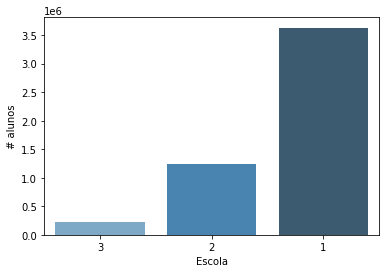

In [118]:
dfpd_tipo_escolas = tipo_escolas.toPandas()
dfpd_tipo_escolas = dfpd_tipo_escolas.rename(columns = {'TP_ESCOLA' : 'Escola', 'count' : '# alunos'})
dfpd_tipo_escolas = dfpd_tipo_escolas.sort_values(by = '# alunos')
sns.barplot(data = dfpd_tipo_escolas , x = 'Escola', y = '# alunos', palette = 'Blues_d');

In [124]:
tipo_escolas.show()


+---------+-------+
|TP_ESCOLA|  count|
+---------+-------+
|        3| 218632|
|        1|3629376|
|        2|1247262|
+---------+-------+



In [122]:
tipo_escolas2 = df_filtered.groupby(['TP_DEPENDENCIA_ADM_ESC']).count()
tipo_escolas2.show()

+----------------------+-------+
|TP_DEPENDENCIA_ADM_ESC|  count|
+----------------------+-------+
|                     3|   9650|
|                  null|3947858|
|                     1|  49091|
|                     4| 164333|
|                     2| 924338|
+----------------------+-------+



### Analisando a renda

In [119]:
renda = df_filtered.groupby('Q006').count()

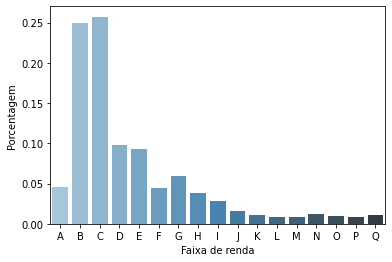

In [88]:
dfpd_rendas = renda.toPandas().sort_values(by = 'Q006')
dfpd_rendas = dfpd_rendas.rename(columns = {'Q006' : 'Faixa de renda', 'count' : 'Porcentagem'})
dfpd_rendas['Porcentagem'] = dfpd_rendas['Porcentagem']/dfpd_rendas['Porcentagem'].sum()

sns.barplot(data = dfpd_rendas , x = 'Faixa de renda', y = 'Porcentagem', palette = 'Blues_d');

Como observado, em sua grande maioria os estudantes estão na fixa B e C, ou seja, entre R\\$998,00 e R\\$1497,00. Vamos analisar agora o faixa de renda por escola estudada (privada ou pública)

In [100]:
reda_escolas = df_filtered.groupby(['Q006', 'TP_ESCOLA']).count()

dfpd_rendas_escolas = reda_escolas.toPandas().sort_values(by = 'Q006')
dfpd_rendas_escolas = dfpd_rendas_escolas.rename(columns = {'Q006' : 'Faixa de renda', 
                                                            'count' : 'Porcentagem',
                                                            'TP_ESCOLA' : 'Tipo de Escola'})


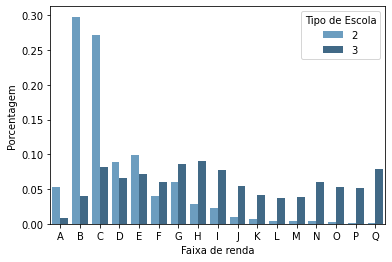

In [109]:
df_count_rendas = dfpd_rendas_escolas.groupby('Tipo de Escola').sum()
df_count_rendas = df_count_rendas.rename(columns = {'Porcentagem' : 'count_alunos'})
dfpd_rendas_escolas = dfpd_rendas_escolas.merge(df_count_rendas, on = 'Tipo de Escola')
dfpd_rendas_escolas['Porcentagem'] = dfpd_rendas_escolas['Porcentagem']/dfpd_rendas_escolas['count_alunos']


sns.barplot(data = dfpd_rendas_escolas[(dfpd_rendas_escolas['Tipo de Escola'] == '2') | (dfpd_rendas_escolas['Tipo de Escola'] == '3')] , x = 'Faixa de renda', y = 'Porcentagem', hue = 'Tipo de Escola', palette = 'Blues_d');

Como visto, os alunos de escolas públicas são predominantemente dos grupos B e C. Já os alunos de instituições privadas são de diversos grupos, tendo boa parte concentrada nos grupos C, G, H, I e Q.

## Análise por estados
Focando apenas nos estados do Sudeste, vamos verificar a renda dos estudantes e o tipo de escola (pública ou privada)

In [125]:
salario_estados = df_filtered.groupby(['SG_UF_RESIDENCIA', 'Q006']).count()
salario_estados_pd = salario_estados.toPandas()

In [160]:
dados_renda_SE = (salario_estados_pd[salario_estados_pd.SG_UF_RESIDENCIA.isin(['MG', 'SP', 'RJ', 'ES'])].
groupby(['Q006', 'SG_UF_RESIDENCIA']).first()).reset_index()

In [161]:
estudantes_estado = dados_renda_SE.groupby('SG_UF_RESIDENCIA').agg({'count' : 'sum'})
estudantes_estado = estudantes_estado.rename(columns = {'count' : 'tot_est'})
dados_renda_SE = dados_renda_SE.merge(estudantes_estado, on = 'SG_UF_RESIDENCIA')
dados_renda_SE['porcent'] = dados_renda_SE['count']/dados_renda_SE.tot_est


<AxesSubplot:xlabel='Q006', ylabel='porcent'>

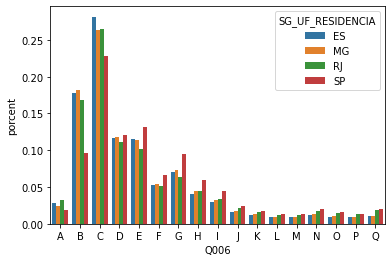

In [162]:
sns.barplot(data = dados_renda_SE, x = 'Q006', y = 'porcent', hue = 'SG_UF_RESIDENCIA')

Dadas as rendas
- A-Nenhuma renda
- B-Até R\\$ 998,00.
- C-De R\\$ 998,01 até R\\$ 1.497,00.
- D-De R\\$ 1.497,01 até R\\$ 1.996,00.
- E-De R\\$ 1.996,01 até R\\$ 2.495,00.
- F-De R\\$ 2.495,01 até R\\$ 2.994,00.
- G-De R\\$ 2.994,01 até R\\$ 3.992,00.
- H-De R\\$ 3.992,01 até R\\$ 4.990,00.
- I-De R\\$ 4.990,01 até R\\$ 5.988,00.
- J-De R\\$ 5.988,01 até R\\$ 6.986,00.
- K-De R\\$ 6.986,01 até R\\$ 7.984,00.
- L-De R\\$ 7.984,01 até R\\$ 8.982,00.
- M-De R\\$ 8.982,01 até R\\$ 9.980,00.
- N-De R\\$ 9.980,01 até R\\$ 11.976,00.
- O-De R\\$ 11.976,01 até R\\$ 14.970,00.
- P-De R\\$ 14.970,01 até R\\$ 19.960,00.
- Q-Mais de R\\$ 19.960,00.

e observando o gráfico, é possível ver que o estado de São Paulo possui uma maior proporção de estudantes com renda familiar maior que os outros estados. 


In [165]:
salario_estados_percp = df_filtered.groupby(['SG_UF_RESIDENCIA', 'Q006', 'Q005']).count()
dfpd_percp = salario_estados_percp.toPandas()

In [175]:
dfpd_percp_SE = (dfpd_percp[dfpd_percp.SG_UF_RESIDENCIA.isin(['MG', 'SP', 'RJ', 'ES'])].
groupby(['Q006', 'Q005', 'SG_UF_RESIDENCIA']).first()).reset_index()
dfpd_percp_SE = dfpd_percp_SE.merge(estudantes_estado, on = 'SG_UF_RESIDENCIA')
dfpd_percp_SE['porcent'] = dfpd_percp_SE['count']/dfpd_percp_SE.tot_est


<AxesSubplot:xlabel='Q005', ylabel='porcent'>

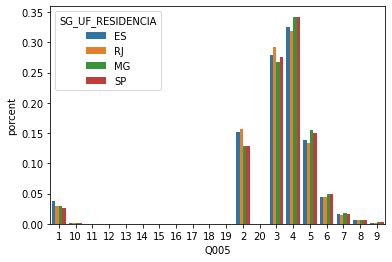

In [185]:
(sns.barplot(data = dfpd_percp_SE.groupby(['SG_UF_RESIDENCIA', 'Q005']).agg({'porcent' : 'sum'}).reset_index().sort_values(by = 'Q005'),
             x = 'Q005', y = 'porcent', hue = 'SG_UF_RESIDENCIA'))

In [48]:
scores_type_school = df_filtered.groupby('TP_DEPENDENCIA_ADM_ESC').agg({'NU_NOTA_CN' : 'mean',
                                                                        'NU_NOTA_CH' : 'mean',
                                                                        'NU_NOTA_LC' : 'mean',
                                                                        'NU_NOTA_MT' : 'mean',
                                                                        'NU_NOTA_REDACAO' : 'mean'})

In [49]:
df_pandas_scores = scores_type_school.toPandas()

In [50]:
dict_type_school = {'1' : "Federal", 
                    '2' : "Estadual", 
                    '3' : "Municipal", 
                    '4': "Privada"}
df_pandas_scores = df_pandas_scores.replace({'TP_DEPENDENCIA_ADM_ESC' : dict_type_school})

<AxesSubplot:ylabel='avg(NU_NOTA_CN)'>

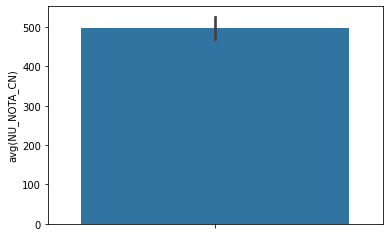

In [64]:
sns.barplot(data = a, y = 'avg(NU_NOTA_CN)', hue = 'TP_DEPENDENCIA_ADM_ESC')

In [69]:
a = df_pandas_scores.stack()

In [110]:
dfpd_rendas_escolas

,Faixa de renda,Tipo de Escola,Porcentagem,count_alunos
0,A,2,0.053369,1247262
1,B,2,0.298051,1247262
2,C,2,0.272149,1247262
3,D,2,0.088883,1247262
4,E,2,0.099118,1247262
5,F,2,0.039858,1247262
6,G,2,0.060533,1247262
7,H,2,0.028712,1247262
8,I,2,0.023314,1247262
9,J,2,0.009745,1247262


In [113]:
df_filtered.select(['CO_MUNICIPIO_RESIDENCIA', 'NO_MUNICIPIO_RESIDENCIA']).show()

+-----------------------+-----------------------+
|CO_MUNICIPIO_RESIDENCIA|NO_MUNICIPIO_RESIDENCIA|
+-----------------------+-----------------------+
|                1506807|               Santar�m|
|                1504059|             M�e do Rio|
|                1505502|            Paragominas|
|                1507706|   S�o Sebasti�o da ...|
|                1503903|                 Juruti|
|                1500800|             Ananindeua|
|                1504208|                 Marab�|
|                1501402|                  Bel�m|
|                1503606|               Itaituba|
|                1507607|    S�o Miguel do Guam�|
|                1506609|    Santa Maria do Par�|
|                1508100|                Tucuru�|
|                1500800|             Ananindeua|
|                1501402|                  Bel�m|
|                1500800|             Ananindeua|
|                1502400|              Castanhal|
|                1501402|                  Bel�m|


'Enem dados.ipynb'       microdados_enem_2019.zip
 microdados_enem_2019/   selarios.csv
